In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.models import load_model
img_width, img_height = 216, 384

In [2]:
class_names = ['brak', 'wada banderoli', 'wada nakretki', 'Ok nakrętka i banderola']

In [4]:
def make_prediction(src, model, show_image):
    for root, subdirs, files in os.walk(src):
        for images in files:
            img = Image.open(root + images)
            img = img.resize((img_width, img_height))
            if(show_image):
                img.show()
            #img = np.array(img).astype('float32')
            #img = img / 255.0
            X_to_predict = np.expand_dims(img, axis=0)
            y_pred = model.predict(X_to_predict)
            prediction_class = y_pred.argmax()
            
            print(prediction_class)
            print(class_names[prediction_class])
            print(y_pred)
            

print(class_names)

['brak', 'wada banderoli', 'wada nakretki', 'Ok nakrętka i banderola']


# Do odczytu

In [44]:
model2 = load_model('nowosc.06-0.22.h5')

In [45]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 382, 214, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 191, 107, 16)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 189, 105, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 94, 52, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 92, 50, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 90, 48, 64)       

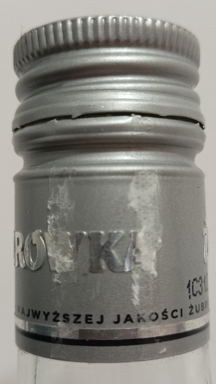

1
wada banderoli
[[0. 1. 0. 0.]]


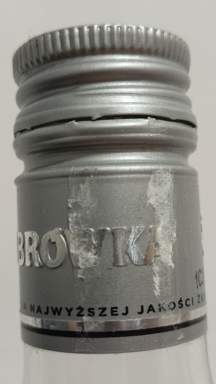

1
wada banderoli
[[0. 1. 0. 0.]]


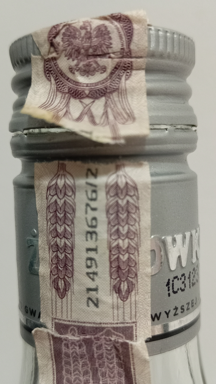

1
wada banderoli
[[0. 1. 0. 0.]]


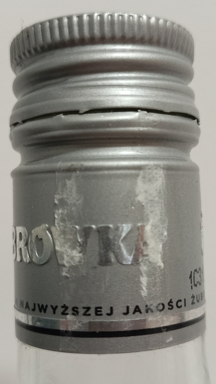

1
wada banderoli
[[0. 1. 0. 0.]]


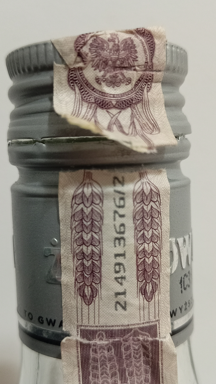

1
wada banderoli
[[0. 1. 0. 0.]]


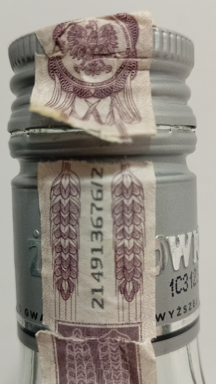

1
wada banderoli
[[0. 1. 0. 0.]]


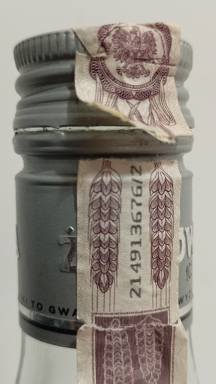

1
wada banderoli
[[0. 1. 0. 0.]]


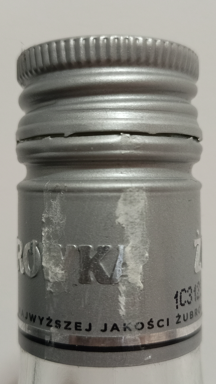

1
wada banderoli
[[0. 1. 0. 0.]]


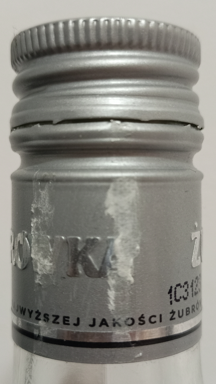

1
wada banderoli
[[0. 1. 0. 0.]]


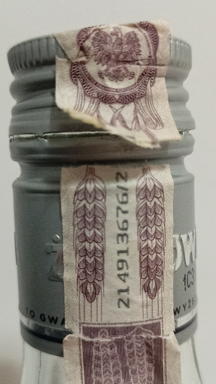

1
wada banderoli
[[0. 1. 0. 0.]]


In [42]:
make_prediction('dataset/dziala testy/wada banderoli/', model2, True)

In [17]:
def check_prediction(src, class_directories, model):
    for index, class_dirs in enumerate(class_directories):
        for directory_name in class_dirs:
            full_dir_name = "{src}{dir}".format(src=src, dir = directory_name)
            print("Sprawdzanie folderu '{dir_name}' jako '{class_name}'".format(dir_name = full_dir_name, class_name = class_names[index]))
            class_images = 0
            class_correct_images = 0
            for root, subdirs, files in os.walk(full_dir_name):
                for images in files:
                    img = Image.open(root + images)
                    img = img.resize((img_width, img_height))
                    #img = np.array(img).astype('float32')
                    #img = img / 255.0
                    X_to_predict = np.expand_dims(img, axis=0)
                    y_pred = model.predict(X_to_predict)
                    prediction_class = y_pred.argmax()

                    if(prediction_class == index):
                        class_correct_images = class_correct_images + 1
                    class_images = class_images + 1

            print("{correct} na {total_images} było poprawny".format(correct = class_correct_images, total_images = class_images))
    


In [43]:
check_prediction('dataset/dziala testy/', [["brak/"], ['wada banderoli/'], ["wada nakretki/"], ["Ok nakrętka i banderola/"]], model2)

Sprawdzanie folderu 'dataset/dziala testy/brak/' jako 'brak'
10 na 10 było poprawny
Sprawdzanie folderu 'dataset/dziala testy/wada banderoli/' jako 'wada banderoli'
10 na 10 było poprawny
Sprawdzanie folderu 'dataset/dziala testy/wada nakretki/' jako 'wada nakretki'
10 na 10 było poprawny
Sprawdzanie folderu 'dataset/dziala testy/Ok nakrętka i banderola/' jako 'Ok nakrętka i banderola'
10 na 10 było poprawny


In [9]:
class_names

['Brak banderolo',
 'Brak nakrętka',
 'Niedokręcona',
 'Ok nakrętka i banderola',
 'Przekrzywiona nakrętka']

In [19]:
56/60

0.9333333333333333